# Data Wrangling Template

## Gather

In [2]:
from zipfile import *
import pandas as pd


## Assess

In [3]:
with ZipFile('archive.zip', mode='r') as myzip:
    myzip.extractall()

## Clean
#### Define

#### Code

In [4]:
!ls

README.md                     example-job-posting.jpg
Untitled.ipynb                features.txt
archive.zip                   online-job-postings.csv
data-wrangling-template.ipynb


#### Test

In [5]:
df_csv = pd.read_csv('online-job-postings.csv')

In [6]:
df_csv.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [7]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [8]:
df = df_csv[['StartDate']].value_counts()

In [9]:
df_p = pd.DataFrame(df)

In [10]:
df_p.head(10)

,0
StartDate,
ASAP,4754
Immediately,773
As soon as possible,543
Upon hiring,261
Immediate,259
Immediate employment,140
As soon as possible.,32
01 September 2012,31
March 2006,27


## Data Qualities
Missing Values
StartData Column data -> ASAP, As soon as..
Column names to be- non descriptive 
ApplicationP, AboutC, RequiredQual, Jobrequirement



## Cleaning
Starting by fixing the start date problems


In [11]:
# condensing ASAP type comments to ASAP
def fix_date(a):
    if a in ['ASAP', 'Immediately', 'As soon as possible', 'Immediate', 'Immediate employment', 'As soon as possible.']:
        return 'ASAP'
    return a
    

In [12]:
df_csv['StartDate1'] = df_csv['StartDate'].apply(lambda x: fix_date(x))

In [13]:
df_csv['StartDate1'].value_counts()

ASAP                                   6501
Upon hiring                             261
01 September 2012                        31
March 2006                               27
November 2006                            22
                                       ... 
10 August 2009                            1
10  August 2009                           1
By the end of the summer 2005             1
Courses start on September 1, 2009.       1
Open                                      1
Name: StartDate1, Length: 1181, dtype: int64

In [14]:

help(df_csv.rename)

Help on method rename in module pandas.core.frame:

rename(mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool | None' = None, inplace: 'bool' = False, level: 'Level' = None, errors: 'IgnoreRaise' = 'ignore') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, axis=0``
     

In [15]:
# Fixing column names

In [16]:
df_csv.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT', 'StartDate1'],
      dtype='object')

In [17]:
columns={'AboutC':'AboutCompany', 'ApplicationP': 'ApplicationProcedure', 'JobRequirment': 'JobRequirement', 'RequiredQual':'RequiredQualifications'}

In [18]:
df_csv.rename(columns=columns, inplace=True)

In [19]:
df_csv.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT', 'StartDate1'],
      dtype='object')

In [20]:
# All the elements to be replaced

asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [21]:
for ph in asap_list:
    df_csv['StartDate'].replace(to_replace=ph, value='ASAP', inplace=True)

In [22]:
df_csv['StartDate'].value_counts()

ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Flexible                1
11 April 2010           1
3-21 July 2006          1
07 April 2010           1
25 March 2009           1
Name: StartDate, Length: 1140, dtype: int64

In [23]:
df_csv.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT', 'StartDate1'],
      dtype='object')

In [24]:
df_csv['StartDate'].values

array([nan, nan, nan, ..., 'ASAP', nan, nan], dtype=object)

In [25]:
# Testing

for phrase in asap_list:
    assert phrase not in df_csv['StartDate'].values

<Axes: ylabel='StartDate'>

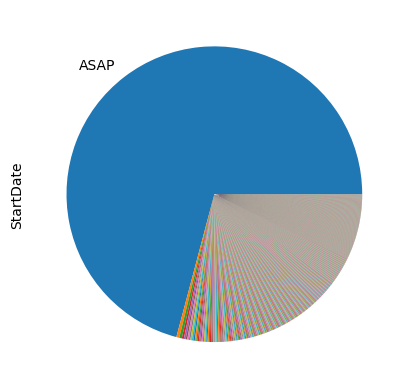

In [26]:
# Analysis and Visualizations

%matplotlib inline
import numpy as np
labels = np.full(len(df_csv.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_csv.StartDate.value_counts().plot(kind="pie", labels=labels)